In [1]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from subprocess import Popen,PIPE,STDOUT,call

In [2]:
from IPython.core.pylabtools import figsize
figsize(20, 10)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def tree(prefix='Sherpa', directory='', depth=2):
    proc=Popen('tree -L {depth} {prefix}Results/'.format(depth=depth, prefix=prefix) +directory, shell=True, stdout=PIPE, )
    output=proc.communicate()[0]
    print(output)
    
def loss_plot(df):    
    sns.lineplot(x='Iteration',y='mse',data=df,label='mse')
    sns.lineplot(x='Iteration',y='val_mse',data=df,label='val mse')
    
def view_hyper_params(df, folder, model_type):
    # summary of hyper params from model
    params = ['net_type', 'loss_type', 'lr', 'num_layers', 'dropout', 'batch_norm', 'Trial-ID', 'val_mse']
    for param in params:
        if param == 'val_mse':
            print(param, ':', df[param].min())
        else:
            try: print(param, ':', df[param].unique()[0])
            except: pass
            
    print('Location:', 'SherpaResults/{}/{}/Models/%05d.h5'.format(folder, model_type)  % df['Trial-ID'].unique()[0])
        
def plot(folder, model_type):    
    df = pd.read_csv('SherpaResults/{}/{}/output/results.csv'.format(folder, model_type))
    df['val_mse'] = np.nan; df['mse'] = np.nan
    
    # incorporate mean squared error info from training
    for trial_num in df['Trial-ID'].unique():
        try:
            with open('SherpaResults/{}/{}/Models/%05d.json'.format(folder, model_type)  % trial_num) as mse_file:
                mse_info = eval(mse_file.read())
            mse_info['mean_squared_error'].insert(0,np.nan); mse_info['val_mean_squared_error'].insert(0,np.nan)
            
            for itr in range(len(df['mse'][df['Trial-ID'] == trial_num])):
                df['mse'][(df['Trial-ID'] == trial_num) & (df['Iteration'] == itr)] = mse_info['mean_squared_error'][itr]
                df['val_mse'][(df['Trial-ID'] == trial_num) & (df['Iteration'] == itr)] = mse_info['val_mean_squared_error'][itr]
        except:
            continue 
    
    # drop bad trials
    bad_trials = df[(df['val_mse'] > 1000) | (df['val_mse'] < 0)]['Trial-ID'].unique()
    good_trials_df = df[~df['Trial-ID'].isin(bad_trials)].reset_index()
    
    # ID of trial with lowest val mse
    best_trial_ID = good_trials_df.iloc[good_trials_df['val_mse'].idxmin()]['Trial-ID']

    # trial with lowest val mse
    min_loss_trial = good_trials_df[good_trials_df['Trial-ID'] == best_trial_ID]
    min_loss = df['val_mse'].min()
    
    # plot all good trials
    plt.subplot(2,1,1)
    plt.title(model_type.replace('_', ' '))
    loss_plot(good_trials_df)
    
    # plot best trial
    plt.subplot(2,1,2)
    plt.title('Best ' + model_type.replace('_', ' '))
    loss_plot(min_loss_trial)
    
    plt.subplots_adjust(hspace = 0.4)
    plt.show()
    
    view_hyper_params(min_loss_trial, folder, model_type)

# Sherpa Results
---

In [5]:
tree()

SherpaResults/
├── 8col
│   └── normal_mse
├── 8col_local
│   └── normal_mse
├── 8col_random
│   └── normal_mse
├── fluxbypass_aqua
│   ├── conservation_mse
│   ├── conservation_weak_loss
│   ├── normal_mse
│   └── normal_weak_loss
├── fluxbypass_aqua_local
│   ├── conservation_mse
│   ├── conservation_weak_loss
│   ├── normal_mse
│   └── normal_weak_loss
├── fluxbypass_aqua_random_search
│   ├── conservation_mse
│   ├── conservation_weak_loss
│   ├── normal_mse
│   └── normal_weak_loss
├── land_data
│   └── normal_mse
└── land_data_random
    └── normal_mse

25 directories, 0 files



# Random Search
---
### Normal MSE

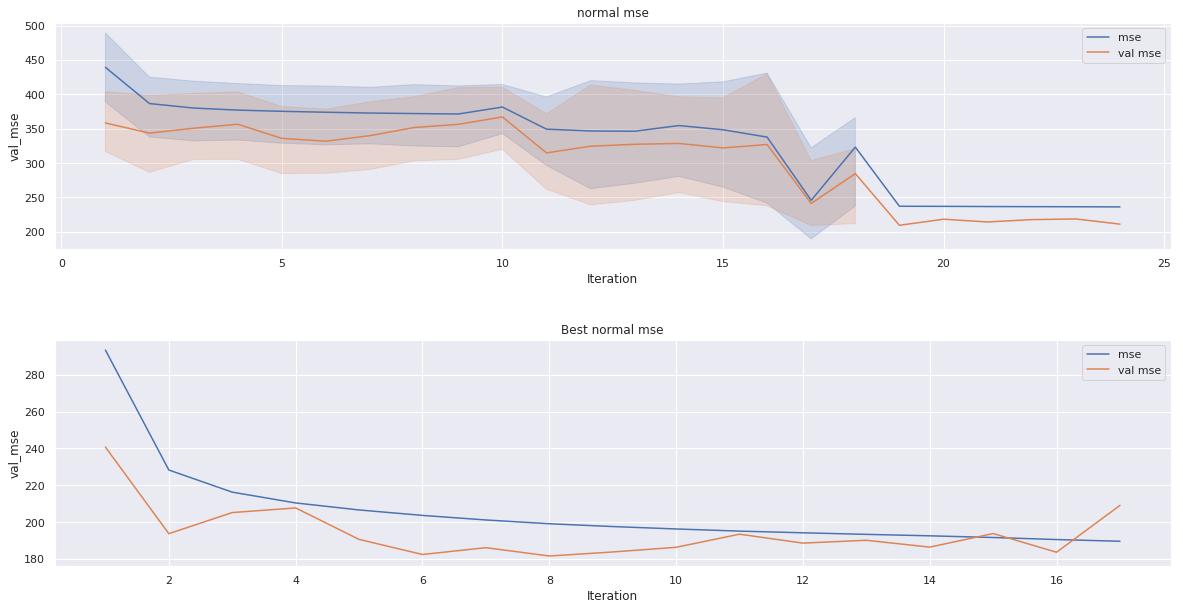

net_type : normal
loss_type : mse
lr : 0.0009218521868010564
num_layers : 6
dropout : 0.0615109591187567
batch_norm : 0
Trial-ID : 5
val_mse : 181.59040659601524
Location: SherpaResults/fluxbypass_aqua_random_search/normal_mse/Models/00005.h5


In [6]:
plot('fluxbypass_aqua_random_search', 'normal_mse')

### Normal Weak Loss

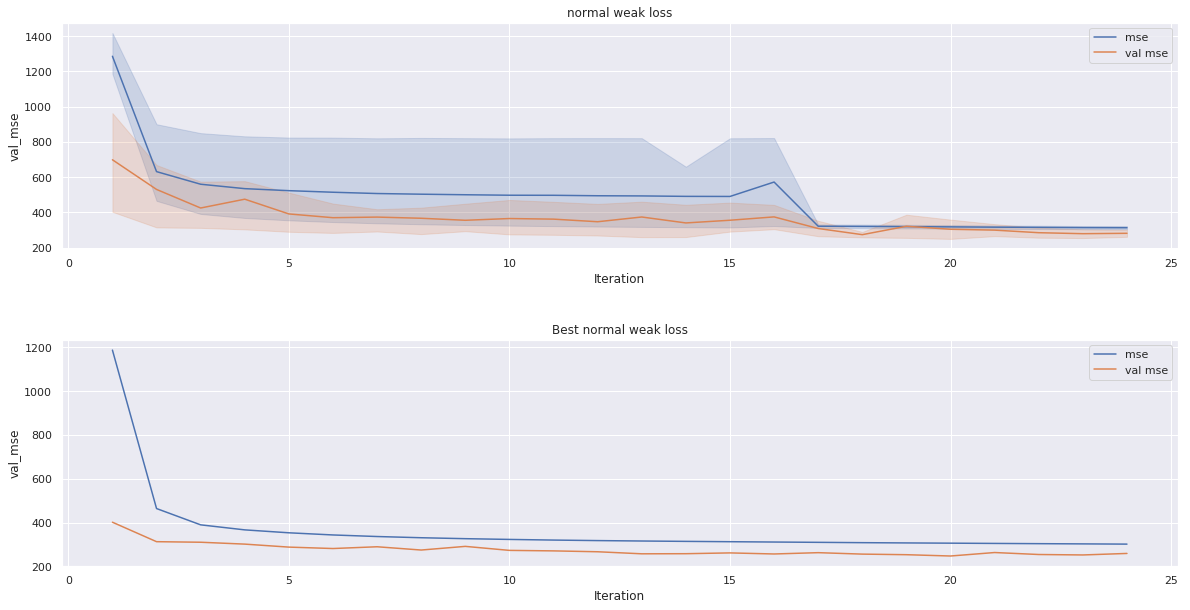

net_type : normal
loss_type : weak_loss
lr : 0.00015800329494968594
num_layers : 7
dropout : 0.35367844798622505
batch_norm : 0
Trial-ID : 2
val_mse : 248.9695280744231
Location: SherpaResults/fluxbypass_aqua_random_search/normal_weak_loss/Models/00002.h5


In [7]:
plot('fluxbypass_aqua_random_search', 'normal_weak_loss')

### Conservation MSE

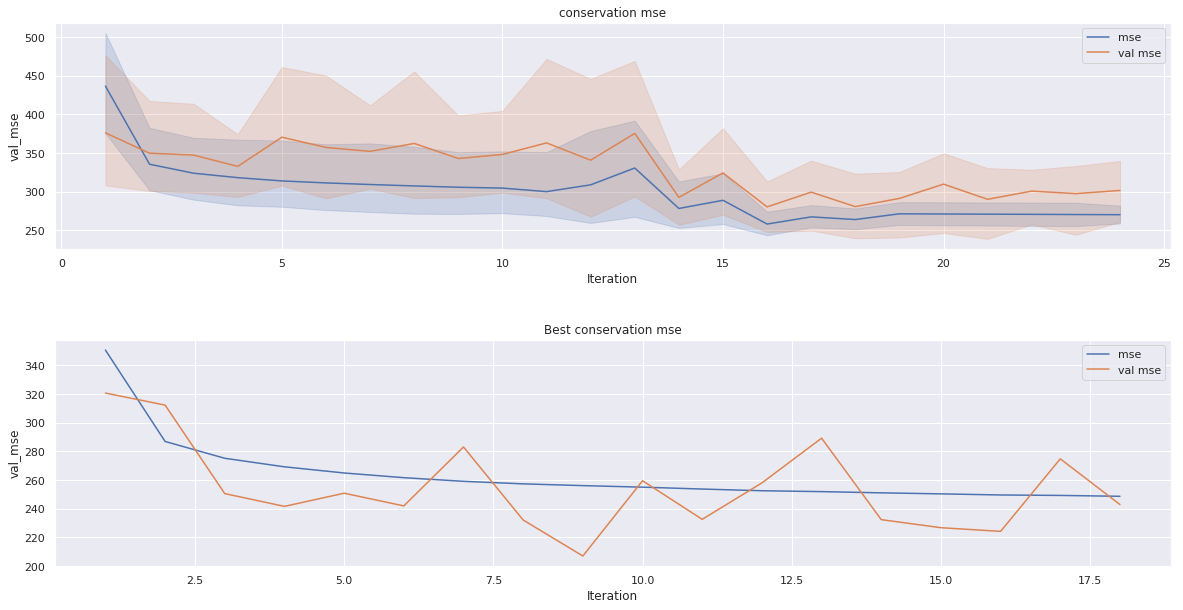

net_type : conservation
loss_type : mse
lr : 0.005966616156791128
num_layers : 3
dropout : 0.12505679916469647
batch_norm : 0
Trial-ID : 7
val_mse : 207.07998276826308
Location: SherpaResults/fluxbypass_aqua_random_search/conservation_mse/Models/00007.h5


In [8]:
plot('fluxbypass_aqua_random_search', 'conservation_mse')

### Conservation Weak Loss

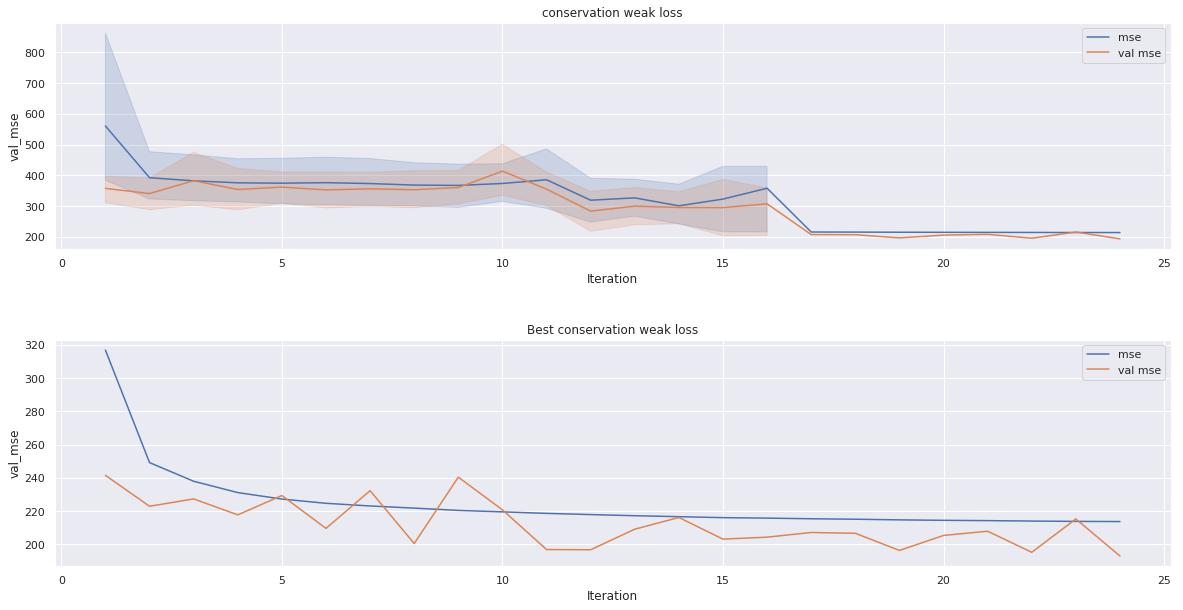

net_type : conservation
loss_type : weak_loss
lr : 0.00848913613043334
num_layers : 3
dropout : 0.03013168455623388
batch_norm : 0
Trial-ID : 12
val_mse : 192.98977964577156
Location: SherpaResults/fluxbypass_aqua_random_search/conservation_weak_loss/Models/00012.h5


In [9]:
plot('fluxbypass_aqua_random_search', 'conservation_weak_loss')

# Local Search
---
### Normal MSE

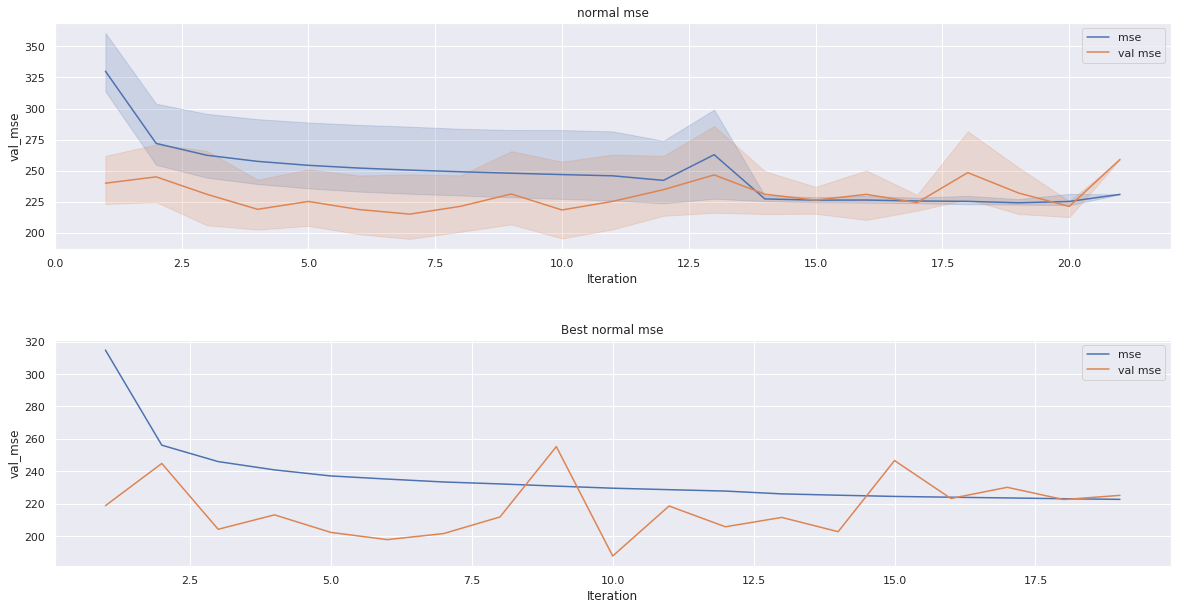

net_type : normal
loss_type : mse
lr : 0.001
num_layers : 5
dropout : 0.25
batch_norm : 0
Trial-ID : 5
val_mse : 187.71397621439854
Location: SherpaResults/fluxbypass_aqua/normal_mse/Models/00005.h5


In [12]:
plot('fluxbypass_aqua', 'normal_mse')

### Normal Weak Loss

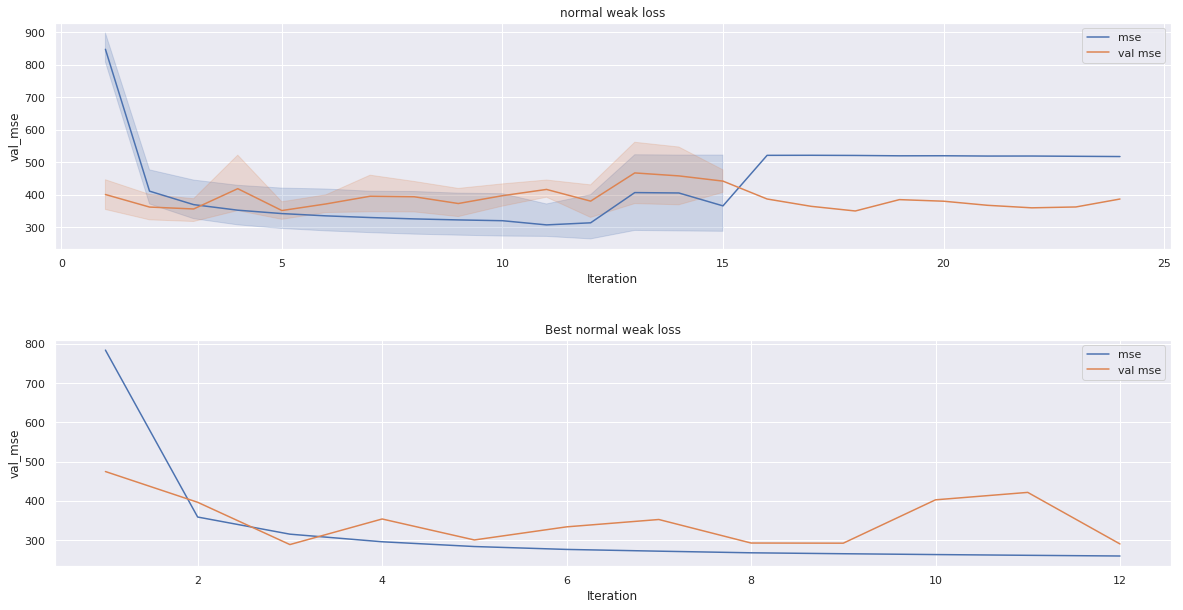

net_type : normal
loss_type : weak_loss
lr : 0.0008
num_layers : 5
dropout : 0.25
batch_norm : 0
Trial-ID : 2
val_mse : 289.009685827242
Location: SherpaResults/fluxbypass_aqua/normal_weak_loss/Models/00002.h5


In [13]:
plot('fluxbypass_aqua', 'normal_weak_loss')

### Conservation MSE

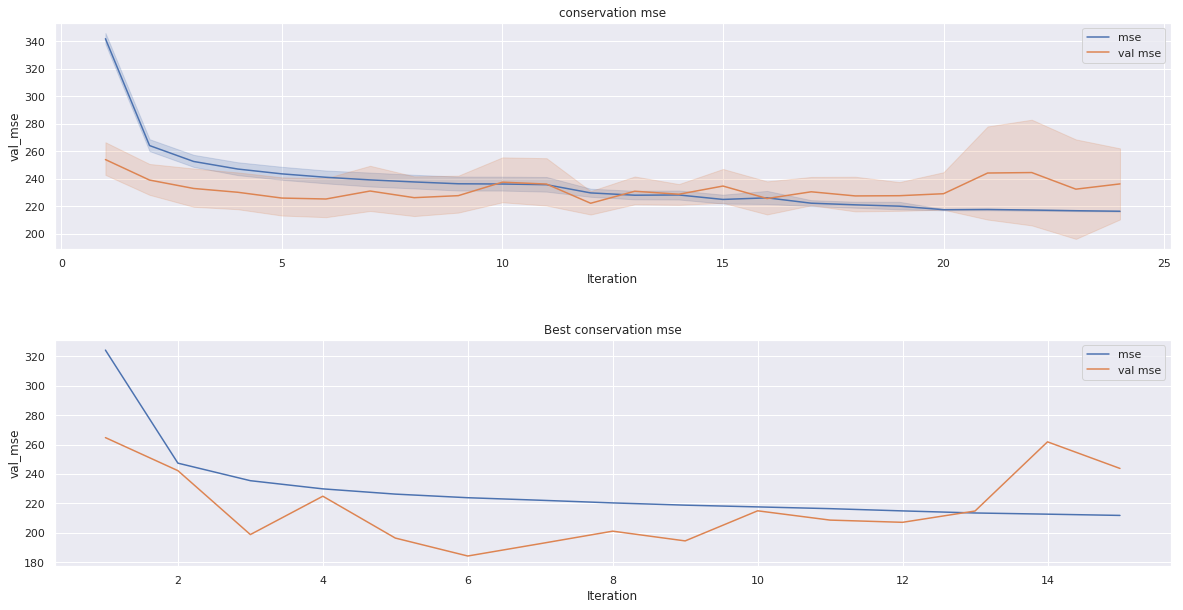

net_type : conservation
loss_type : mse
lr : 0.0008
num_layers : 5
dropout : 0.12800000000000006
batch_norm : 0
Trial-ID : 29
val_mse : 184.16590518137326
Location: SherpaResults/fluxbypass_aqua/conservation_mse/Models/00029.h5


In [14]:
plot('fluxbypass_aqua', 'conservation_mse')

### Conservation Weak Loss

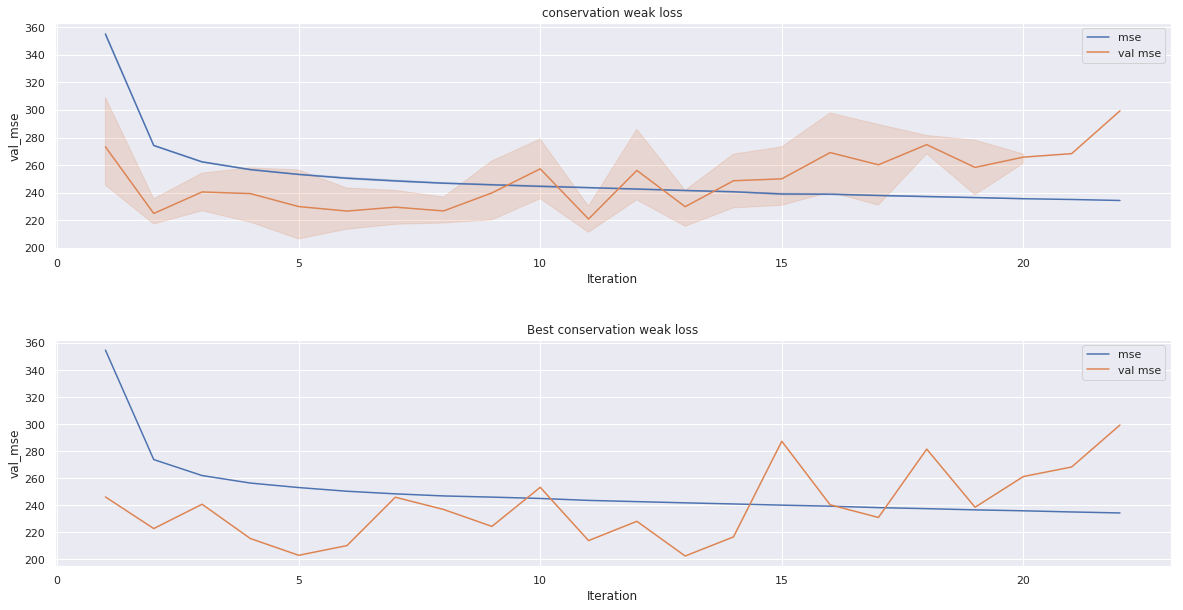

net_type : conservation
loss_type : weak_loss
lr : 0.001
num_layers : 5
dropout : 0.25
batch_norm : 0
Trial-ID : 1
val_mse : 202.58125765436117
Location: SherpaResults/fluxbypass_aqua/conservation_weak_loss/Models/00001.h5


In [15]:
plot('fluxbypass_aqua', 'conservation_weak_loss')